### What is Autocorrelation?

So far, you have looked at the correlation of two time series. Autocorrelation is the correlation of a single time series with a lagged copy of itself. It's also called "serial correlation".

<img src="au.jpg" style="max-width:500px">

Often, when we refer to a series's autocorrelation, we mean the "lag-one" autocorrelation. So when using daily data, for example, the autocorrelation would be the correlation of the series with the same series lagged by one day.


### Interpretation of Autocorrelation

What does it mean when a series has a positive or negative autocorrelation? 

With financial time series, when returns have a `negative autocorrelation`, we say it is `"mean reverting"`.

<img src="au-1.jpg" style="max-width:500px">

Alternatively, if a series has `positive autocorrelation`, we say it is `"trend-following"`.

<img src="au-2.jpg" style="max-width:500px">


### Traders Use Autocorrelation to Make Money

Lest you think these concepts of autocorrelation are purely theoretical, they are actually used on Wall Street to make money. Many hedge fund strategies are only slightly more complex versions of mean reversion and momentum strategies. 

Since stocks have historically had `negative autocorrelation` over horizons of about a week, one popular strategy is to buy stocks that have dropped over the last week and sell stocks that have gone up. 

<img src="au-3.jpg" style="max-width:500px">

For other assets like commodities and currencies, they have historically had positive autocorrelation over horizons of several months, so the typical hedge fund strategy there is to buy commodities that have gone up in the last several months and sell those commodities that have gone down.


### Example of Positive Autocorrelation: Exchange Rates

Here is an example of how you would compute the monthly autocorrelation for the Japanese Yen-US Dollar exchange rate. The data was downloaded from the FRED website, which stands for Federal Reserve Economic Data. 


<img src="au-4.jpg" style="max-width:500px">

- The date column was read in as a string, so before you can compute autocorrelations, you will have to convert the dates in the DataFrame index to a datetime object using the pandas method "to_datetime". 

- Now that it's a datetime object, downsample the data using the resample method. The "rule" argument indicates the desired frequency. 'M' stands for monthly. The how argument indicates how to do the resampling. For example, you can use the first date of the period, the last date, or even an average. 


- Finally, compute the autocorrelation using the pandas method "autocorr". Notice in this example that the autocorrelation is positive, 0.0567, so this series exhibits some momentum.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
MSFT = pd.read_csv("MSFT.csv")
MSFT = MSFT.set_index("Date")
MSFT.head()

,Adj Close
Date,
8/6/2012,26.107651
8/7/2012,26.377876
8/8/2012,26.438896
8/9/2012,26.587088
8/10/2012,26.517351


In [3]:
MSFT.index = pd.to_datetime(MSFT.index)
MSFT.index

DatetimeIndex(['2012-08-06', '2012-08-07', '2012-08-08', '2012-08-09',
               '2012-08-10', '2012-08-13', '2012-08-14', '2012-08-15',
               '2012-08-16', '2012-08-17',
               ...
               '2017-07-24', '2017-07-25', '2017-07-26', '2017-07-27',
               '2017-07-28', '2017-07-31', '2017-08-01', '2017-08-02',
               '2017-08-03', '2017-08-04'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

## Exercise 1: A Popular Strategy Using Autocorrelation

One puzzling anomaly with stocks is that investors tend to overreact to news. Following large jumps, either up or down, stock prices tend to reverse. This is described as mean reversion in stock prices: prices tend to bounce back, or revert, towards previous levels after large moves, which are observed over time horizons of about a week. A more mathematical way to describe mean reversion is to say that stock returns are negatively autocorrelated.

This simple idea is actually the basis for a popular hedge fund strategy.

You'll look at the autocorrelation of weekly returns of `MSFT stock from 2012 to 2017`. You'll start with a DataFrame `MSFT` of daily prices. You should use the `.resample()` method to get weekly prices and then compute returns from prices. 

Use the pandas method `.autocorr()` to get the autocorrelation and show that the autocorrelation is `negative`. 

Note that the .autocorr() method only works on Series, not DataFrames (even DataFrames with one column), so you will have to select the column in the DataFrame.

- Use the .resample() method with rule='W' to convert daily data to weekly data. Use The new syntax .resample().last().


- Create a new DataFrame, returns, of percent changes in weekly prices using the .pct_change() method.


- Compute the autocorrelation using the .autocorr() method on the series of closing stock prices, which is the column 'Adj Close' in the DataFrame returns.

In [4]:
# Convert the daily data to weekly data
MSFT = MSFT.resample(rule='W').last()
MSFT

,Adj Close
Date,
2012-08-12,26.517351
2012-08-19,27.114212
2012-08-26,26.815865
2012-09-02,27.044012
2012-09-09,27.158091
...,...
2017-07-09,69.459999
2017-07-16,72.779999
2017-07-23,73.790001


In [5]:
# Compute the percentage change of prices
returns = MSFT.pct_change()
returns

,Adj Close
Date,
2012-08-12,NaN
2012-08-19,0.022508
2012-08-26,-0.011003
2012-09-02,0.008508
2012-09-09,0.004218
...,...
2017-07-09,0.007689
2017-07-16,0.047797
2017-07-23,0.013877


In [6]:
# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.16


Notice how the autocorrelation of returns for MSFT is negative, so the stock is 'mean reverting'

In [7]:
Bonds = pd.read_csv("Bonds.csv")
Bonds = Bonds.set_index("observation_date")

In [8]:
Bonds.index = pd.to_datetime(Bonds.index)
Bonds.index

DatetimeIndex(['2007-06-08', '2007-06-11', '2007-06-12', '2007-06-13',
               '2007-06-14', '2007-06-15', '2007-06-18', '2007-06-19',
               '2007-06-20', '2007-06-21',
               ...
               '2017-05-25', '2017-05-26', '2017-05-30', '2017-05-31',
               '2017-06-01', '2017-06-02', '2017-06-05', '2017-06-06',
               '2017-06-07', '2017-06-08'],
              dtype='datetime64[ns]', name='observation_date', length=2503, freq=None)

In [9]:
Bonds.head()

,US10Y
observation_date,
2007-06-08,5.12
2007-06-11,5.14
2007-06-12,5.26
2007-06-13,5.20
2007-06-14,5.23


In [10]:
Bonds.diff()

,US10Y
observation_date,
2007-06-08,NaN
2007-06-11,0.02
2007-06-12,0.12
2007-06-13,-0.06
2007-06-14,0.03
...,...
2017-06-02,-0.06
2017-06-05,0.03
2017-06-06,-0.04


## Exercise 2: Are Interest Rates Autocorrelated?

When you look at daily changes in interest rates, the autocorrelation is close to zero. However, if you resample the data and look at annual changes, the autocorrelation is negative. This implies that while short term changes in interest rates may be uncorrelated, long term changes in interest rates are negatively autocorrelated. A daily move up or down in interest rates is unlikely to tell you anything about interest rates tomorrow, but a move in interest rates over a year can tell you something about where interest rates are going over the next year. And this makes some economic sense: over long horizons, when interest rates go up, the economy tends to slow down, which consequently causes interest rates to fall, and vice versa.

The DataFrame Bonds contains daily data of 10-year interest rates from 2007 to 2017.


- Create a new DataFrame, daily_diff, of changes in Bonds using the .diff() method.


- Compute the autocorrelation of the column 'US10Y' in daily_diff using the .autocorr() method.


- Use the .resample() method with arguments rule='A' to convert to annual frequency and use The new syntax .resample().last() .


- Create a new DataFrame, yearly_diff of changes in annual rates and compute the autocorrelation, as above.

In [11]:
# Compute the daily change in interest rates 
daily_diff = Bonds.iloc[1:].diff()
print(daily_diff, "\n")

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_diff['US10Y'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

                  US10Y
observation_date       
2007-06-11          NaN
2007-06-12         0.12
2007-06-13        -0.06
2007-06-14         0.03
2007-06-15        -0.07
...                 ...
2017-06-02        -0.06
2017-06-05         0.03
2017-06-06        -0.04
2017-06-07         0.04
2017-06-08         0.01

[2502 rows x 1 columns] 

The autocorrelation of daily interest rate changes is -0.03


In [12]:
# Convert the daily data to annual data
yearly_rates = Bonds.iloc[1:].resample(rule='A').last()
print(yearly_rates)

                  US10Y
observation_date       
2007-12-31         4.04
2008-12-31         2.25
2009-12-31         3.85
2010-12-31         3.30
2011-12-31         1.89
2012-12-31         1.78
2013-12-31         3.04
2014-12-31         2.17
2015-12-31         2.27
2016-12-31         2.45
2017-12-31         2.19


In [13]:
# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff['US10Y'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

The autocorrelation of annual interest rate changes is -0.48


### Autocorrelation Function

The sample autocorrelation function, or ACF, shows not only the lag-one autocorrelation, but the entire autocorrelation function for different lags. Any significant non-zero autocorrelations implies that the series can be forecast from the past.

<img src="af.jpg" style="max-width:500px">

### ACF Example 1: Simple Autocorrelation Function

<img src="af-2.jpg" style="max-width:500px">

This autocorrelation function implies that you can forecast the next value of the series from the last two values, since the lag-one and lag-two autocorrelations differ from zero.

### ACF Example 2: Seasonal Earnings

Consider the time series of quarterly earnings of the company H&R Block. A vast majority of their earnings occurs in the quarter that taxes are due. 

<img src="af-3.jpg" style="max-width:500px">

In this case, you can clearly see a seasonal pattern in the quarterly data on the left, and the autocorrelation function on the right shows strong autocorrelation at lags 4, 8, 12, 16, and 20

### ACF Example 3: Useful for Model Selection

The ACF can also be useful for selecting a parsimonious model for fitting the data. 


###  Plot ACF in Python

`plot_acf` is the statsmodels function for plotting the autocorrelation function. 

<img src="af-5.jpg" style="max-width:500px">

The input x is a series or array. The argument lags indicates how many lags of the autocorrelation function will be plotted. The alpha argument sets the width of the confidence interval, which is discussed on the next slide.

### Confidence Interval of ACF

<img src="af-6.jpg" style="max-width:500px">

Here is an ACF plot that contains confidence intervals for each lag, which is the blue region in the figure.

### Confidence Interval of ACF

In plot_acf, the argument alpha determines the width of the confidence intervals. 

<img src="af-7.jpg" style="max-width:500px">

For example:

- if alpha equals 0.05, that means that if the true autocorrelation at that lag is zero, there is only a 5% chance the sample autocorrelation will fall outside that window. 


- You will get a wider confidence interval if you set alpha lower, or if you have fewer observations. 


- An approximation to the width of the 95% confidence intervals, if you make some simplifying assumptions, is plus or minus 2 over the square root of the number of observations in your series. Incidentally, if you don't want to see confidence intervals in your plot, set alpha equal to one.

### ACF Values Instead of Plot

Besides plotting the ACF, you can also extract its numerical values using a similar Python function, acf, instead of plot_acf.

<img src="af-8.jpg" style="max-width:500px">

In [14]:
HRB = pd.read_csv("HRB.csv")
HRB.head()

,Quarter,Earnings
0,2007Q1,-0.36
1,2007Q2,-0.38
2,2007Q3,0.07
3,2007Q4,1.85
4,2008Q1,-0.34


In [15]:
HRB = HRB.set_index("Quarter")
HRB.head()

,Earnings
Quarter,
2007Q1,-0.36
2007Q2,-0.38
2007Q3,0.07
2007Q4,1.85
2008Q1,-0.34


In [16]:
HRB.index = pd.to_datetime(HRB.index)
HRB

,Earnings
Quarter,
2007-01-01,-0.36
2007-04-01,-0.38
2007-07-01,0.07
2007-10-01,1.85
2008-01-01,-0.34
2008-04-01,-0.42
2008-07-01,0.02
2008-10-01,2.11
2009-01-01,-0.39


## Exercise 3: Taxing Exercise: Compute the ACF

In the last chapter, you computed autocorrelations with one lag. Often we are interested in seeing the autocorrelation over many lags. 

<img src="t-2.jpg" style="max-width:400px">

In The quarterly earnings for H&R Block (ticker symbol HRB) is plot above, and you can see the extreme cyclicality of its earnings. A vast majority of its earnings occurs in the quarter that taxes are due.

You will compute the array of autocorrelations for the H&R Block quarterly earnings that is pre-loaded in the DataFrame `HRB`. 

Then, plot the autocorrelation function using the `plot_acf` module. This plot shows what the autocorrelation function looks like for cyclical earnings data. The `ACF at lag=0 is always one`, of course. For now, suppress the confidence interval by setting `alpha=1`.

- Import the acf module and plot_acf module from statsmodels.


- Compute the array of autocorrelations of the quarterly earnings data in DataFrame HRB.


- Plot the autocorrelation function of the quarterly earnings data in HRB, and pass the argument alpha=1 to suppress the confidence interval.

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

In [18]:
ac_quart_earn = HRB["Earnings"].autocorr()
ac_quart_earn

-0.24428975075297543

In [19]:
acf_array = acf(HRB, fft=False)
acf_array

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


array([ 1.        , -0.22122696, -0.39856504, -0.26615093,  0.83479804,
       -0.1901038 , -0.3475634 , -0.23140368,  0.71995993, -0.15661007,
       -0.29766783, -0.22097189,  0.61656933, -0.15022869, -0.27922022,
       -0.22465946,  0.5725259 , -0.08758288, -0.24075584, -0.20363054,
        0.4797058 , -0.06091139, -0.20935484, -0.18303202,  0.42481275,
       -0.03352559, -0.17471087, -0.16384328,  0.34341079, -0.01734364,
       -0.13820811, -0.12232172,  0.28407164, -0.01927656, -0.11757974,
       -0.10386933,  0.20156485, -0.0120634 , -0.07509539, -0.0707104 ,
        0.10222029])

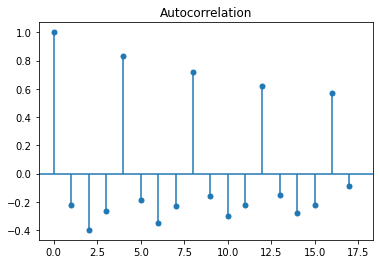

In [20]:
plot_acf(HRB, alpha = 1)
plt.show()

Notice the strong positive autocorrelation at lags 4, 8, 12, 16,20, ...

In [21]:
returns = returns.iloc[1:]
returns.head()

,Adj Close
Date,
2012-08-19,0.022508
2012-08-26,-0.011003
2012-09-02,0.008508
2012-09-09,0.004218
2012-09-16,0.008400


## Exercise 4: Are We Confident This Stock is Mean Reverting?

In the Exercise 1, you saw that the autocorrelation of MSFT's weekly stock returns was -0.16. That autocorrelation seems large, but is it statistically significant? In other words, can you say that there is less than a 5% chance that we would observe such a large negative autocorrelation if the true autocorrelation were really zero? And are there any autocorrelations at other lags that are significantly different from zero?

Even if the true autocorrelations were zero at all lags, in a finite sample of returns you won't see the estimate of the autocorrelations exactly zero. In fact, the standard deviation of the sample autocorrelation is `1/root(N)` where `N` is the number of observations, so if , for example, the standard deviation of the ACF is `0.1`, and since `95%` of a normal curve is between `+1.96 and -1.96` standard deviations from the mean, the 95% confidence interval is `(+-)1.96/root(N)` . This approximation only holds when the true autocorrelations are all zero.


You will compute the actual and approximate confidence interval for the ACF, and compare it to the lag-one autocorrelation of -0.16 from the Exercise 1. The weekly returns of Microsoft is pre-loaded in a DataFrame called `returns`.


- Recompute the autocorrelation of weekly returns in the Series 'Adj Close' in the returns DataFrame.


- Find the number of observations in the returns DataFrame using the len() function.


- Approximate the 95% confidence interval of the estimated autocorrelation. The math function sqrt() has been imported and can be used.


- Plot the autocorrelation function of returns using plot_acf that was imported from statsmodels. Set alpha=0.05 for the confidence intervals (that's the default) and lags=20.

In [22]:
# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly MSFT returns is -0.16


In [23]:
# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)
nobs

260

In [24]:
import numpy as np

In [25]:
# Compute the approximate confidence interval
conf = 1.96/np.sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

The approximate confidence interval is +/- 0.12


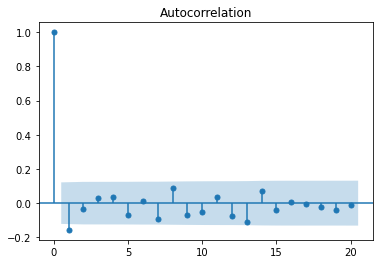

In [26]:
plot_acf(returns, lags = 20, alpha = 0.05)
plt.show()

### White Noise
Although people define white noise slightly differently, a general definition is that it is a `series` with `mean` that is `constant with time`, a `variance` that is also `constant with time`, and `zero autocorrelation at all lags`. 

There are several special cases of White Noise. For example, if the data is white noise but also has a normal, or Gaussian, distribution, then it is called `Gaussian White Noise`.

### Simulating White Noise

numpy random normal creates an array of normally distributed random numbers. 

<img src="wn.jpg" style="max-width:400px">

The `loc` argument is the `mean` and the `scale` argument is the `standard deviation`. This is one way to generate a white noise series.

<img src="wn-1.jpg" style="max-width:400px">

And here is a plot of the white noise series.

### Autocorrelation of White Noise

<img src="wn-2.jpg" style="max-width:400px">

And `all the autocorrelations of a white noise series are zero`. The `returns` on the `stock market` are pretty `close to a white noise` process.

### Stock Market Returns: Close to White Noise

<img src="wn-3.jpg" style="max-width:400px">

Here is the autocorrelation function for the S&P500. Notice that there are pretty much no lags where the autocorrelation is significantly different from zero.

## Exercise 5: Can't Forecast White Noise

A `white noise time series` is simply a `sequence of uncorrelated random variables` that are `identically distributed`. 

`Stock returns` are often modeled as white noise. Unfortunately, for white noise, `we cannot forecast future observations based on the past` - autocorrelations at all lags are zero.

You will generate a white noise series and plot the autocorrelation function to show that it is zero for all lags. You can use `np.random.normal()` to generate random returns. For a Gaussian white noise process, the mean and standard deviation describe the entire process.

Plot this white noise series to see what it looks like, and then plot the autocorrelation function.


- Generate 1000 random normal returns using np.random.normal() with mean 2% (0.02) and standard deviation 5% (0.05), where the argument for the mean is loc and the argument for the standard deviation is scale.


- Verify the mean and standard deviation of returns using np.mean() and np.std().


- Plot the time series. Plot the autocorrelation function using plot_acf with lags=20.

In [27]:
noise = np.random.normal(loc = 0.02, scale = 0.05, size = 1000)
# noise

In [28]:
mean = np.mean(noise)
mean

0.02181987740587777

In [29]:
std = np.std(noise)
std

0.05027204031582523

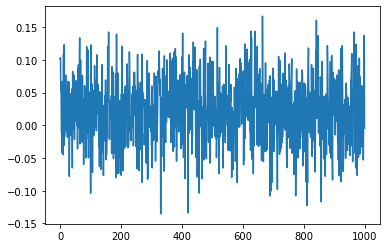

In [30]:
plt.plot(noise)
plt.show()

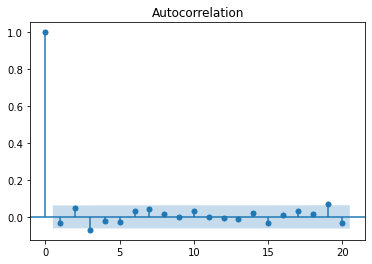

In [31]:
plot_acf(noise, lags = 20)
plt.show()

Notice that for a white noise time series, all the autocorrelations are close to zero, so the past will not help you forecast the future.

### Random Walk
In a random walk, today's price is equal to yesterday's price plus some noise. Here is a plot of a simulated random walk.

<img src="rw.jpg" style="max-width:600px">

The `change in price` of a `random walk` is just `White Noise`. Incidentally, if prices are in logs, then the difference in log prices is one way to measure returns. 

<img src="rw-1.jpg" style="max-width:600px">

`The bottom line is that if stock *prices* follow a random walk, then stock *returns* are White Noise`. You can't forecast a random walk. The best guess for tomorrow's price is simply today's price.

<img src="rw-2.jpg" style="max-width:600px">

In a `random walk with drift`, prices on average drift by mu every period. And the change in price for a random walk with drift is still white noise but with a mean of mu. So if we now think of stock prices as a random walk with drift, then the returns are still white noise, but with an average return of mu instead of zero.


### Statistical Test for Random Walk

To test whether a series like stock prices follows a random walk, you can regress current prices on lagged prices. 

<img src="rw-3.jpg" style="max-width:600px">

If the slope coefficient, beta, is not significantly different from one, then we cannot reject the null hypothesis that the series is a random walk. However, if the slope coefficient is significantly less than one, then we can reject the null hypothesis that the series is a random walk.

<img src="rw-5.jpg" style="max-width:600px">

An identical way to do that test is to regress the difference in prices on the lagged price, and instead of testing whether the slope coefficient is 1, now we test whether it is zero. This is called the "Dickey-Fuller" test. If you add more lagged prices on the right hand side, then it's called the Augmented Dickey-Fuller test.

## Exercise 6: Generate a Random Walk

Whereas `stock returns` are often modeled as `white noise`, `stock prices` closely follow a `random walk`. In other words, today's price is yesterday's price plus some random noise.

You will simulate the price of a stock over time that has a starting price of `100` and every day goes `up or down` by a `random amount`. Then, plot the simulated stock price. If you hit the "Run Code" code button multiple times, you'll see several realizations.


- Generate 500 random normal "steps" with mean=0 and standard deviation=1 using np.random.normal(), where the argument for the mean is loc and the argument for the standard deviation is scale.

- Set first element to 0 so that the first price will be the starting stock price.

- Simulate stock prices P: Cumulate the random steps using the numpy .cumsum() method. Add 100 to P to get a starting stock price of 100. 


- Plot the simulated random walk.

In [32]:
steps = np.random.normal(loc = 0, scale = 1, size = 500)
# steps

In [33]:
steps[0] = 0

In [34]:
P = np.cumsum(steps) 
P = 100 + P
# P

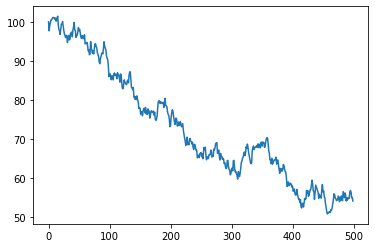

In [35]:
plt.plot(P)
plt.show()

The simulated price series you plotted should closely resemble a random walk.

## Exercise 7: Get the Drift

In the last exercise, you simulated stock prices that follow a random walk. You will extend this in two ways in this exercise.


1. You will look at a random walk with a drift. Many time series, like stock prices, are random walks but tend to drift up over time.


2. In the last exercise, the noise in the random walk was additive: random, normal changes in price were added to the last price. However, when adding noise, you could theoretically get negative prices. Now you will make the noise multiplicative: you will add one to the random, normal changes to get a total return, and multiply that by the last price.


- Generate 500 random normal multiplicative "steps" with mean 0.1% and standard deviation 1% using np.random.normal(), which are now returns, and add one for total return.


- Set first element to 1


- Simulate stock prices P: Cumulate the product of the steps using the numpy .cumprod() method. Multiply the cumulative product of total returns by 100 to get a starting value of 100. 


- Plot the simulated random walk with drift.

In [36]:
returns = np.random.normal(loc = 0.001 , scale = 0.01 , size = 500) + 1
#returns

In [37]:
returns[0] = 1

In [38]:
stock_prices = np.cumprod(returns) * 100
stock_prices 

array([100.        , 100.19066202,  99.58897794,  97.4373128 ,
        97.64587776,  98.27751671,  97.73267459,  97.14481225,
        96.17056212,  95.61512823,  96.89382267,  96.57151631,
        96.61914766,  96.45193053,  95.31286398,  95.43173089,
        97.10055991,  97.75425311,  97.9587383 ,  96.74502227,
        95.51716155,  96.049522  ,  96.18238116,  95.23153715,
        94.40017761,  93.44478645,  92.79963942,  93.80312764,
        94.66011032,  94.94946704,  95.21279988,  96.02346837,
        96.42444988,  96.70239239,  98.14352684,  97.7556191 ,
        98.03178985,  98.18344796,  98.11734439,  98.53481611,
        97.80862121,  98.75672526,  97.03718882,  98.39003843,
        97.73560965,  97.89864875,  97.4132849 ,  96.93283495,
        97.50203501,  96.74150507,  97.36479197,  98.77269362,
        98.27322611, 100.05563823, 100.38343432, 100.18807725,
        99.5486128 ,  99.69040036, 100.40214894, 100.37406232,
        99.16256941,  98.67442153,  98.43994997,  99.16

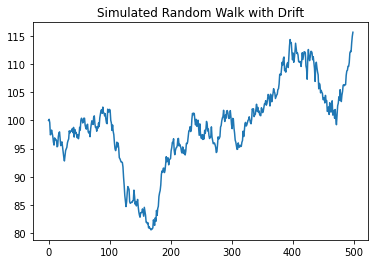

In [39]:
# Plot the simulated stock prices
plt.plot(stock_prices)
plt.title("Simulated Random Walk with Drift")
plt.show()

This simulated price series you plotted should closely resemble a random walk for a high flying stock

### ADF Test in Python

<img src="ad.jpg" style="max-width:400px">

statsmodels has a function, adfuller, for performing the Augmented Dickey-Fuller test.

### Example: Is the S&P500 a Random Walk?

As an example, let's run the Augmented Dickey-Fuller test on a time series of S&P500 prices using the adfuller function. 

<img src="ad-1.jpg" style="max-width:600px">

The results are stored in results. The main output we're interested in is the p-value of the test. 

If the p-value is less than 5%, we can reject the null hypothesis that the series is a random walk with 95% confidence. In this case, the p-value is much higher than 0.05 - it's 0.78. Therefore, we cannot reject the null hypothesis that the S&P500 is a random walk. 

You can also print out the full output of the test, which gives other information, like the number of observations (1257), the test statistic (-point-917) and the critical values of the test statistic for various alphas - 1%, 10%, and 5%.

In [40]:
AMZN = pd.read_csv("AMZN.csv")
AMZN = AMZN.set_index("Date")
AMZN.index = pd.to_datetime(AMZN.index)
AMZN.head()

,Adj Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083


## Exercise 8: Are Stock Prices a Random Walk?

Most stock prices follow a random walk (perhaps with a drift). You will look at a time series of Amazon stock prices, pre-loaded in the DataFrame `AMZN`, and run the 'Augmented Dickey-Fuller Test' from the statsmodels library to show that it does indeed follow a random walk.

With the ADF test, the "null hypothesis" (the hypothesis that we either reject or fail to reject) is that the series follows a random walk. Therefore, a low p-value (say less than 5%) means we can reject the null hypothesis that the series is a random walk.


- Import the adfuller module from statsmodels. Run the Augmented Dickey-Fuller test on the series of closing stock prices, which is the column 'Adj Close' in the AMZN DataFrame.


- Print out the entire output, which includes the test statistic, the p-values, and the critical values for tests with 1%, 10%, and 5% levels.


- Print out just the p-value of the test (results[0] is the test statistic, and results[1] is the p-value).

In [41]:
from statsmodels.tsa.stattools import adfuller

In [42]:
results = adfuller(AMZN['Adj Close'])
results

(4.025168525770738,
 1.0,
 33,
 5054,
 {'1%': -3.4316445438146865,
  '5%': -2.862112049726916,
  '10%': -2.5670745025321304},
 30308.64216426981)

In [43]:
# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

The p-value of the test on prices is: 1.0


According to this test, we cannot reject the hypothesis that Amazon prices follow a random walk.

## Exercise 9: How About Stock Returns?

In the last exercise, you showed that Amazon stock prices, contained in the DataFrame AMZN follow a random walk. 

In this exercise. you will do the same thing for Amazon returns (percent change in prices) and show that the returns do not follow a random walk.


- Import the adfuller module from statsmodels. Create a new DataFrame of AMZN returns by taking the percent change of prices using the method .pct_change().


- Eliminate the NaN in the first row of returns using the .dropna() method on the DataFrame.


- Run the Augmented Dickey-Fuller test on the 'Adj Close' column of AMZN_ret, and print out the p-value in results[1].

In [44]:
AMZN.head()

,Adj Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083


In [45]:
amzn_ret = AMZN.pct_change()
amzn_ret = amzn_ret.dropna()
amzn_ret.head()

,Adj Close
Date,
1997-05-16,-0.117021
1997-05-19,-0.012049
1997-05-20,-0.042683
1997-05-21,-0.127389
1997-05-22,-0.021898


In [46]:
results_ret = adfuller(amzn_ret["Adj Close"])
results_ret

(-12.053453021869629,
 2.5655898083489317e-22,
 33,
 5053,
 {'1%': -3.431644800138127,
  '5%': -2.86211216296977,
  '10%': -2.567074562815631},
 -18483.377508750207)

In [47]:
print('The p-value of the test on returns is: ' + str(results_ret[1]))

The p-value of the test on returns is: 2.5655898083489317e-22


The p-value is extremely small, so we can easily reject the hypothesis. It shows that the stock returns do not follow a random walk like the Stock prices.

###  Stationarity

There are different ways to define stationarity, but in its strictest sense, it means that the joint distribution of the observations do not depend on time. 

<img src="s.jpg" style="max-width:600px">

A less restrictive version of stationarity, and one that is easier to test, is weak stationarity, which just means that the mean, variance, and autocorrelations of the observations do not depend on time. 

In other words, for the autocorrelation, the correlation between X-t and X-(t-tau) is only a function of the lag tau, and not a function of time.

### Why Do We Care?

If a process is not stationary, then it becomes difficult to model. Modeling involves estimating a set of parameters, and if a process is not stationary, and the parameters are different at each point in time, then there are too many parameters to estimate. You may end up having more parameters than actual data! So stationarity is necessary for a parsimonious model, one with a smaller set of parameters to estimate.


### Examples of Nonstationary Series

A random walk is a common type of non-stationary series. The variance grows with time. For example, if stock prices are a random walk, then the uncertainty about prices tomorrow is much less than the uncertainty 10 years from now.

<img src="s-1.jpg" style="max-width:600px">

Seasonal series are also non-stationary. Here is the dataset you saw earlier on the frequency of Google searches for the word 'diet'. The mean varies with the time of the year.

###  Stationarity

There are different ways to define stationarity, but in its strictest sense, it means that the joint distribution of the observations do not depend on time. 

<img src="s.jpg" style="max-width:600px">

A less restrictive version of stationarity, and one that is easier to test, is weak stationarity, which just means that the mean, variance, and autocorrelations of the observations do not depend on time. 

In other words, for the autocorrelation, the correlation between X-t and X-(t-tau) is only a function of the lag tau, and not a function of time.

### Why Do We Care?

If a process is not stationary, then it becomes difficult to model. Modeling involves estimating a set of parameters, and if a process is not stationary, and the parameters are different at each point in time, then there are too many parameters to estimate. You may end up having more parameters than actual data! So stationarity is necessary for a parsimonious model, one with a smaller set of parameters to estimate.


### Examples of Nonstationary Series

A random walk is a common type of non-stationary series. The variance grows with time. For example, if stock prices are a random walk, then the uncertainty about prices tomorrow is much less than the uncertainty 10 years from now.

<img src="s-1.jpg" style="max-width:600px">

Seasonal series are also non-stationary. Here is the dataset you saw earlier on the frequency of Google searches for the word 'diet'. The mean varies with the time of the year.

<img src="s-2.jpg" style="max-width:600px">

Here is White Noise, which would ordinarily be a stationary process, but here the mean increases over time, which makes it non-stationary.

<img src="s-3.jpg" style="max-width:600px">


### Transforming Nonstationary Series Into Stationary Series

Many non-stationary series can be made stationary through a simple transformation. A Random Walk is a non-stationary series, but if you take the first differences, the new series is White Noise, which is stationary. 

<img src="s-4.jpg" style="max-width:800px">

On the left are S&P500 prices, which is a non-stationary random walk, but if you compute first differences on the right, it becomes a stationary white noise process.

<img src="s-5.jpg" style="max-width:800px">

On the left, we have the quarterly earnings for H&R Block, which has a large seasonal component and is therefore not stationary. If we take the seasonal difference, by taking the difference with lag of 4, the transformed series looks stationary.

<img src="s-6.jpg" style="max-width:800px">

Sometimes, you may need to make two transformations. Here is a time series of Amazon's quarterly revenue. It is growing exponentially as well as exhibiting a strong seasonal pattern. First, if you take only the log of the series, in the upper right, you eliminate the exponential growth. But if you take both the log of the series and then the seasonal difference, in the lower right, the transformed series looks stationary.

## Exercise 10: Seasonal Adjustment During Tax Season

Many time series exhibit strong seasonal behavior. The procedure for removing the seasonal component of a time series is called seasonal adjustment. For example, most economic data published by the government is seasonally adjusted.

You saw earlier that by taking first differences of a random walk, you get a stationary white noise process. 

For seasonal adjustments, instead of taking first differences, you will take differences with a lag corresponding to the periodicity.

Look again at the ACF of H&R Block's quarterly earnings, pre-loaded in the DataFrame HRB, and there is a clear seasonal component. 

The autocorrelation is high for lags 4,8,12,16,… because of the spike in earnings every four quarters during tax season. 


Apply a seasonal adjustment by taking the fourth difference (four represents the periodicity of the series). Then compute the autocorrelation of the transformed series.


- Create a new DataFrame of seasonally adjusted earnings by taking the lag-4 difference of quarterly earnings using the .diff() method.


- Examine the first 10 rows of the seasonally adjusted DataFrame and notice that the first four rows are NaN. Drop the NaN rows using the .dropna() method.


- Plot the autocorrelation function of the seasonally adjusted DataFrame.

In [48]:
HRB.head()

,Earnings
Quarter,
2007-01-01,-0.36
2007-04-01,-0.38
2007-07-01,0.07
2007-10-01,1.85
2008-01-01,-0.34


In [59]:
seasonal_adj = HRB.diff(4)
seasonal_adj.head(10)

,Earnings
Quarter,
2007-01-01,NaN
2007-04-01,NaN
2007-07-01,NaN
2007-10-01,NaN
2008-01-01,0.02
2008-04-01,-0.04
2008-07-01,-0.05
2008-10-01,0.26
2009-01-01,-0.05


In [62]:
seasonal_adj = seasonal_adj.dropna()

In [68]:
ac = acf(seasonal_adj, fft = True)
ac

array([ 1.00000000e+00,  2.34591025e-01, -3.47509867e-02, -2.99002071e-01,
       -3.20234139e-01, -1.36249503e-01, -7.58009068e-02,  1.70211363e-01,
        2.55894101e-01,  5.57398589e-02,  9.85155760e-03, -9.30955522e-02,
       -1.31943449e-01, -1.40194808e-01,  4.29824452e-03,  1.29988608e-02,
        5.30440354e-02, -3.63462358e-02,  1.42198327e-02, -4.76283831e-03,
        1.48151968e-03, -9.09037981e-02, -7.98494356e-03, -1.23527593e-02,
       -9.01690989e-03,  5.01851826e-02,  7.74900881e-04,  1.52949051e-02,
        4.40059652e-02, -9.42300158e-03, -2.66381625e-02, -2.67916934e-02,
        2.46782829e-02,  8.34094987e-03, -8.05861946e-03, -1.19326941e-02,
        3.63175923e-02, -7.72258803e-03, -8.35267103e-03, -3.69846466e-04])

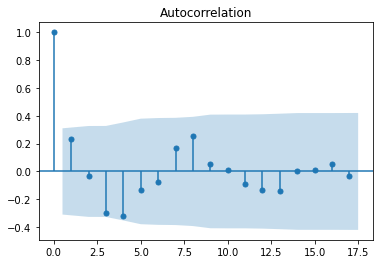

In [63]:
plot_acf(seasonal_adj)
plt.show()